## Preprocess and Explore the Data

Extract historical financial data from **yfinance** for Portfolio Analysis:
- **TSLA** provides potential high returns with high volatility.
- **BND** contributes stability and low risk.
- **SPY** offers diversified, moderate-risk market exposure.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import os, sys
import seaborn as sns
import os, sys

current_dir = os.getcwd()
# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import custom module from data_processor
from scripts.data_preprocessing import DataProcessor

In [3]:
# Import the function
from scripts.extract_data import get_data

# Define the stock symbols
symbol = ['TSLA', 'BND', 'SPY']
# Define the start and end dates for data fetching
start_date = '2015-01-01'
end_date = '2025-02-27'
# Call the function
get_data(symbol, start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed

Data for ['TSLA', 'BND', 'SPY'] downloaded and saved as ../data/../data/['TSLA', 'BND', 'SPY']_data.csv


In [4]:
# Instantiate the DataProcessor class
processor = DataProcessor()

#####  Load yfinance historical data for Tiker symbol [`TSLA`, `BND`, `SPY`]

In [5]:
# Define the stock symbols
symbols = ['TSLA', 'BND', 'SPY']
# Define the start and end dates for data fetching
start_date = '2015-01-01'
end_date = '2025-02-27'

In [6]:
# Fetch the data for the specified symbols and date range
data = processor.get_data(symbols, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##### Data Cleaning

In [7]:
# Clean the data
cleaned_data = processor.clean_data()

In [8]:
# Display basic statistics
stats = processor.basic_statistics()
for symbol, stat in stats.items():
    print(f"\nBasic statistics for {symbol}:\n", stat)


Basic statistics for TSLA:
 Price                            Date        Close         High          Low  \
Ticker                                        TSLA         TSLA         TSLA   
count                            2553  2553.000000  2553.000000  2553.000000   
mean    2020-01-27 16:42:18.190364416   119.505809   122.191288   116.733070   
min               2015-01-02 00:00:00     9.578000    10.331333     9.403333   
25%               2017-07-17 00:00:00    17.316668    17.557333    16.964001   
50%               2020-01-29 00:00:00    34.033333    34.377998    32.799999   
75%               2022-08-10 00:00:00   223.070007   228.860001   218.199997   
max               2025-02-26 00:00:00   479.859985   488.540009   457.510010   
std                               NaN   117.775994   120.566908   114.971688   

Price          Open        Volume  
Ticker         TSLA          TSLA  
count   2553.000000  2.553000e+03  
mean     119.565939  1.118082e+08  
min        9.488000  1.062

In [9]:
# Display basic statistics
stats = processor.basic_statistics()
for symbol, stat in stats.items():
    print(f"\nBasic statistics for {symbol}:\n", stat)


Basic statistics for TSLA:
 Price                            Date        Close         High          Low  \
Ticker                                        TSLA         TSLA         TSLA   
count                            2553  2553.000000  2553.000000  2553.000000   
mean    2020-01-27 16:42:18.190364416   119.505809   122.191288   116.733070   
min               2015-01-02 00:00:00     9.578000    10.331333     9.403333   
25%               2017-07-17 00:00:00    17.316668    17.557333    16.964001   
50%               2020-01-29 00:00:00    34.033333    34.377998    32.799999   
75%               2022-08-10 00:00:00   223.070007   228.860001   218.199997   
max               2025-02-26 00:00:00   479.859985   488.540009   457.510010   
std                               NaN   117.775994   120.566908   114.971688   

Price          Open        Volume  
Ticker         TSLA          TSLA  
count   2553.000000  2.553000e+03  
mean     119.565939  1.118082e+08  
min        9.488000  1.062

#### Exploratory Data Analysis (EDA)

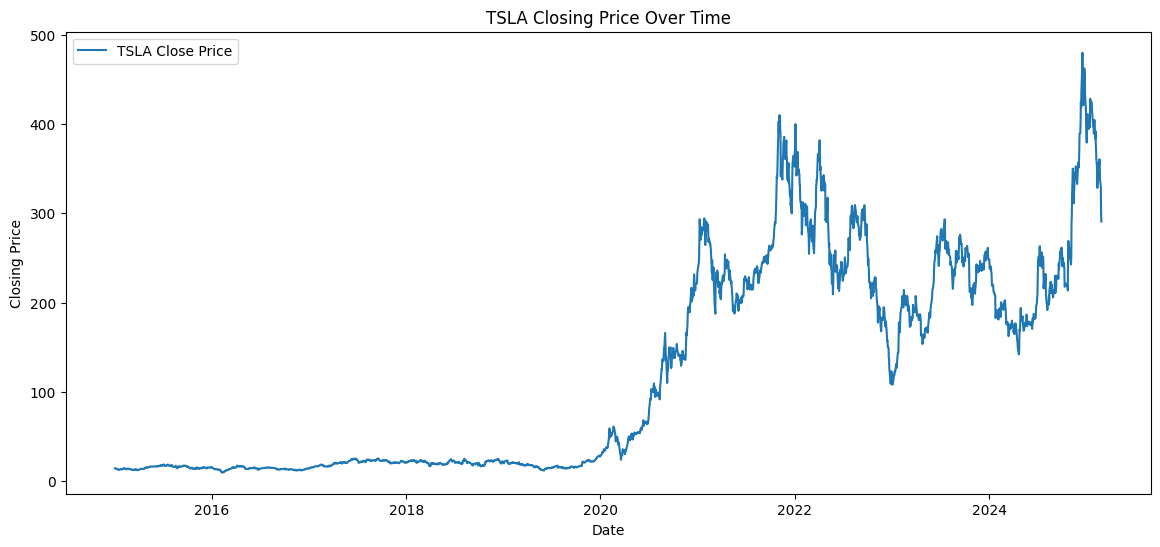

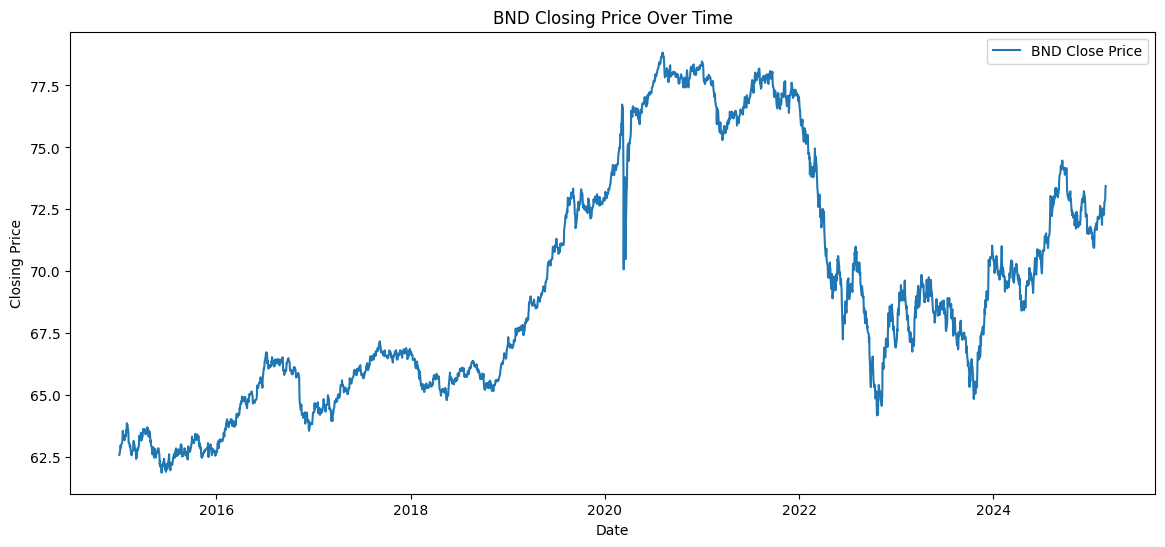

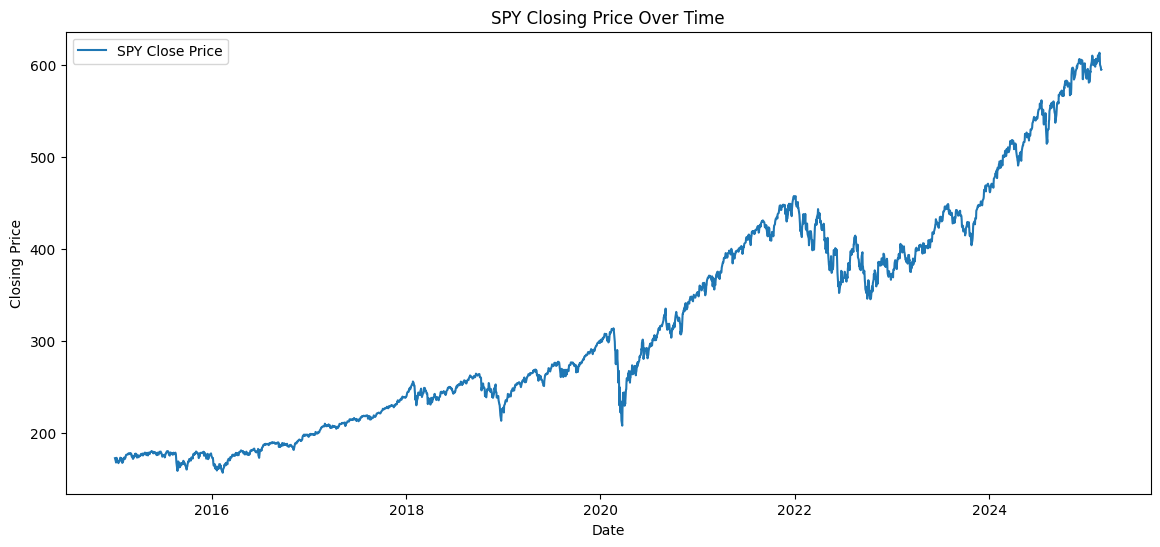

In [10]:
# Plot closing prices over time
processor.plot_closing_prices()

#### Daily Percentage Change

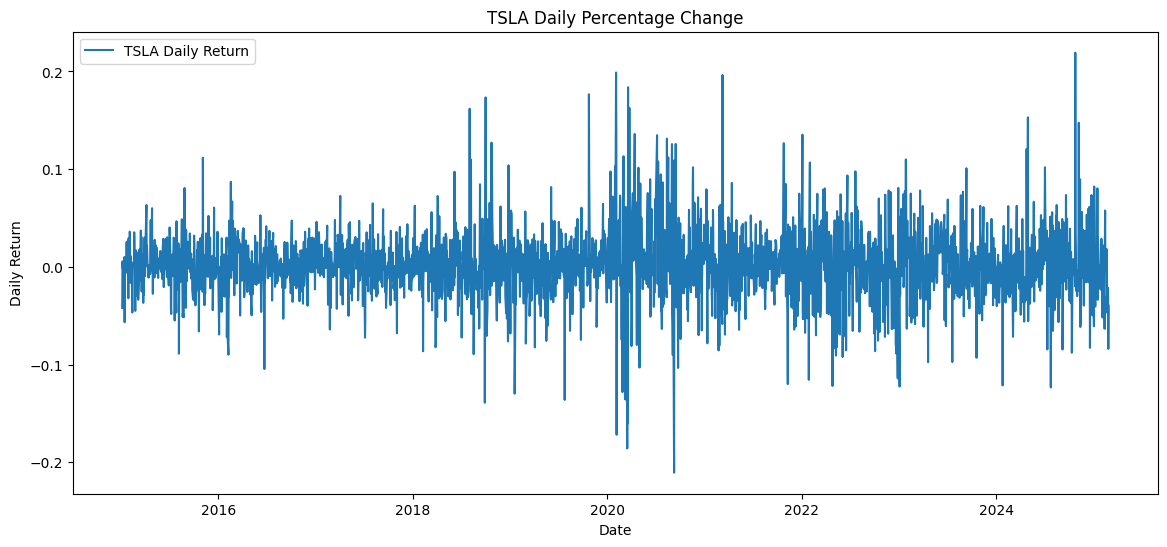

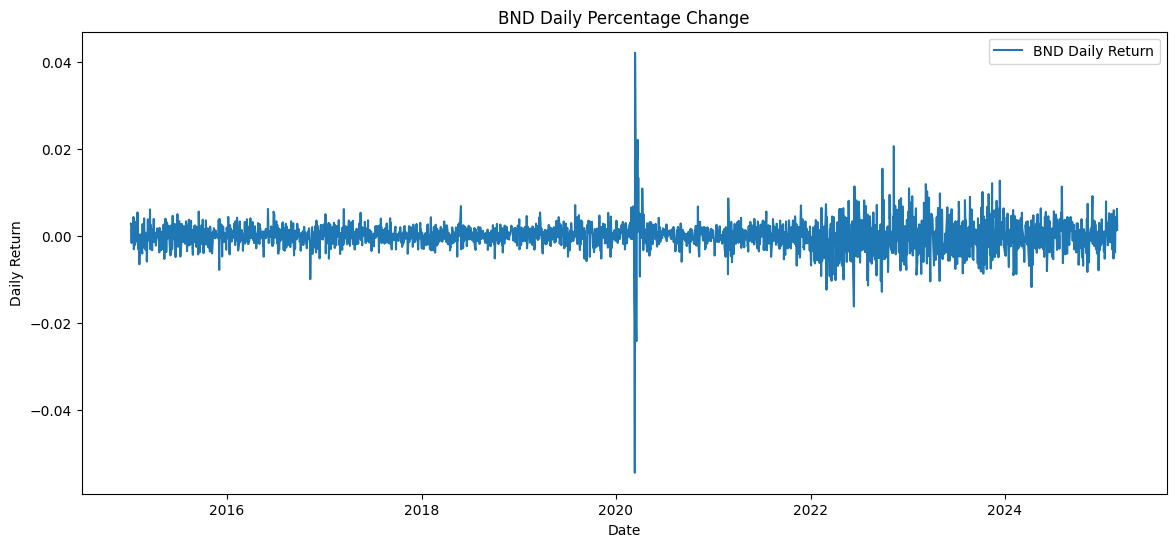

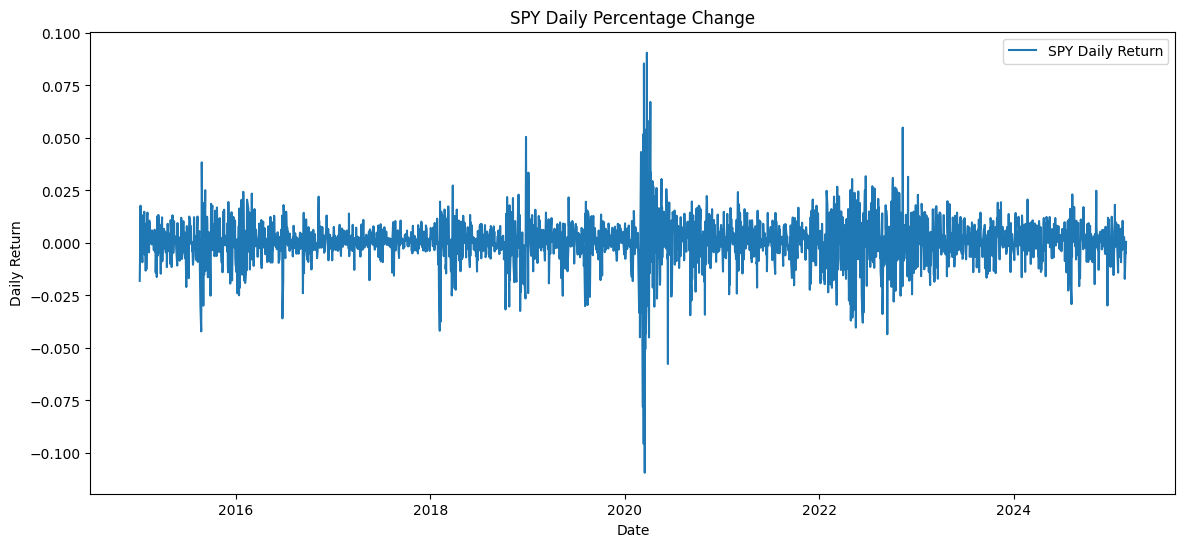

In [11]:
# Calculate and plot daily returns
daily_returns_data = processor.calculate_daily_returns()
processor.plot_daily_returns()

#### Calculating Rolling Means

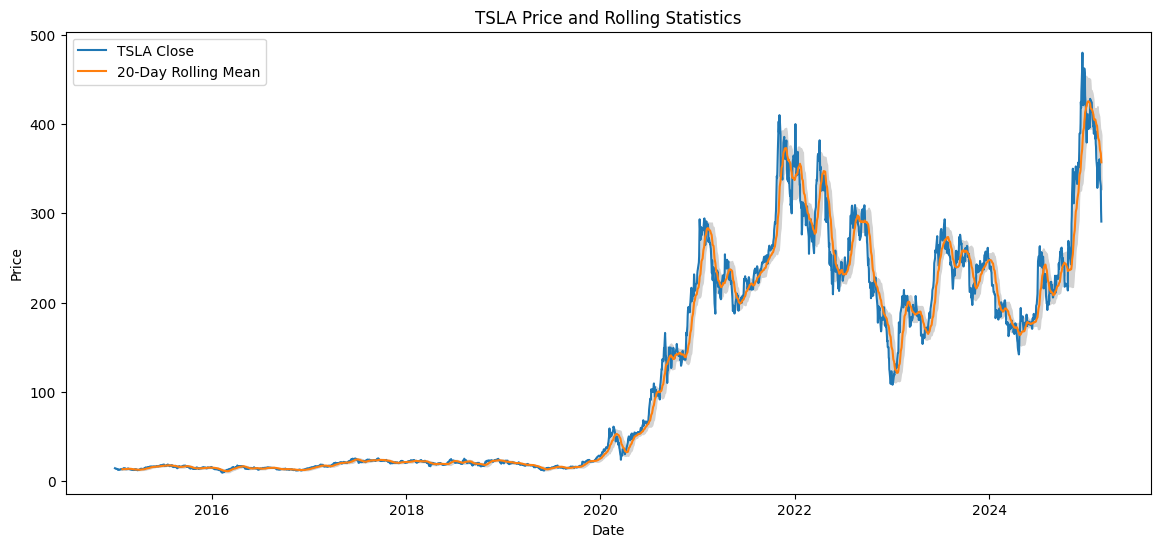

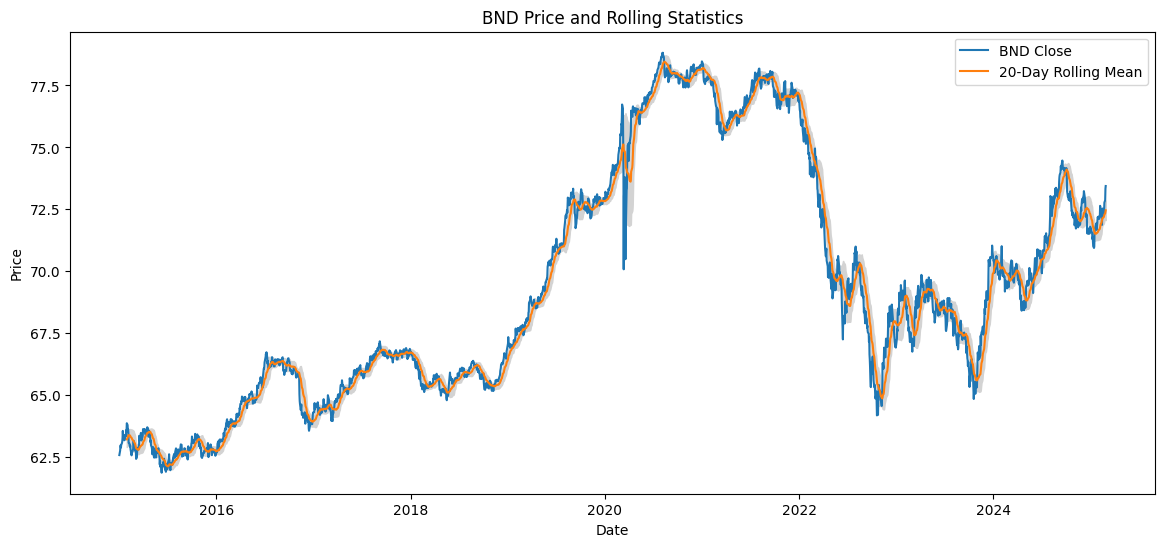

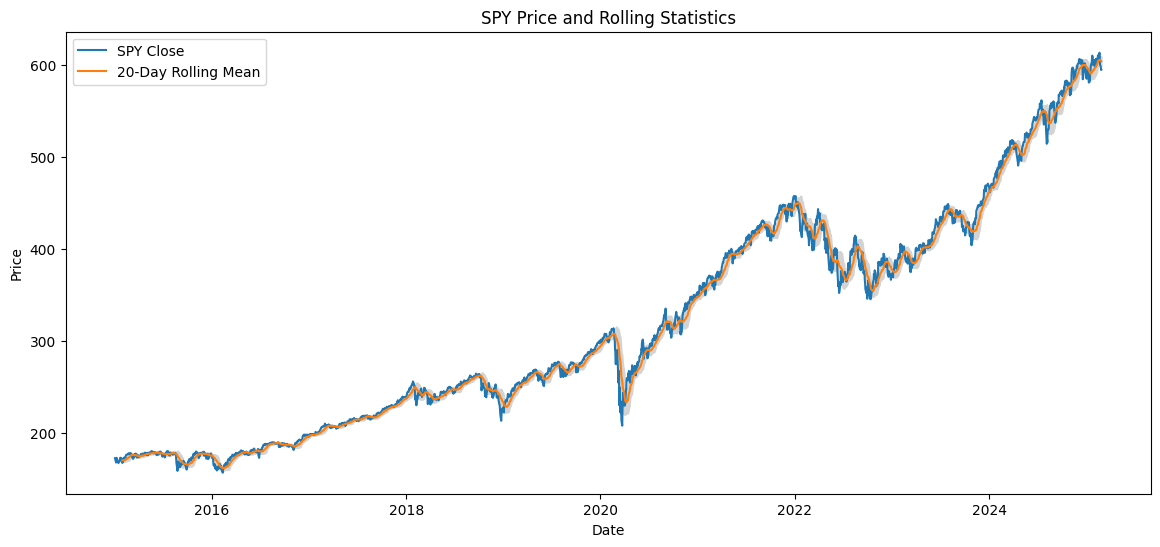

In [12]:
# Calculate and plot rolling statistics
rolling_stats_data = processor.calculate_rolling_stats()
processor.plot_rolling_stats()

**Key Summery**:
- These analyses reveal that TSLA is highly volatile, which could lead to large gains or losses, while BND provides low volatility and stability, and SPY offers a balanced risk profile with market-wide exposure. 
- This diversified mix could be beneficial in a portfolio to manage risk and capitalize on growth opportunities.

#### Outlier Detection

In [13]:
# Detect and print outliers
outliers = processor.detect_outliers()
for symbol, outlier_df in outliers.items():
    print(f"\nOutliers for {symbol}:\n", outlier_df[['Date', 'Daily Return']])


Outliers for TSLA:
 Price        Date Daily Return
Ticker                        
212    2015-11-04     0.111735
902    2018-08-02     0.161880
942    2018-09-28    -0.139015
943    2018-10-01     0.173471
959    2018-10-23     0.127189
1018   2019-01-18    -0.129711
1147   2019-07-25    -0.136137
1211   2019-10-24     0.176692
1279   2020-02-03     0.198949
1280   2020-02-04     0.137256
1281   2020-02-05    -0.171758
1296   2020-02-27    -0.128146
1298   2020-03-02     0.113220
1303   2020-03-09    -0.135725
1306   2020-03-12    -0.116172
1308   2020-03-16    -0.185778
1310   2020-03-18    -0.160344
1311   2020-03-19     0.183877
1314   2020-03-24     0.162817
1327   2020-04-13     0.136038
1385   2020-07-06     0.134794
1412   2020-08-12     0.131236
1415   2020-08-17     0.112031
1425   2020-08-31     0.125689
1430   2020-09-08    -0.210628
1434   2020-09-14     0.125832
1555   2021-03-09     0.196412
1715   2021-10-25     0.126616
1726   2021-11-09    -0.119903
1763   2022-01-03 

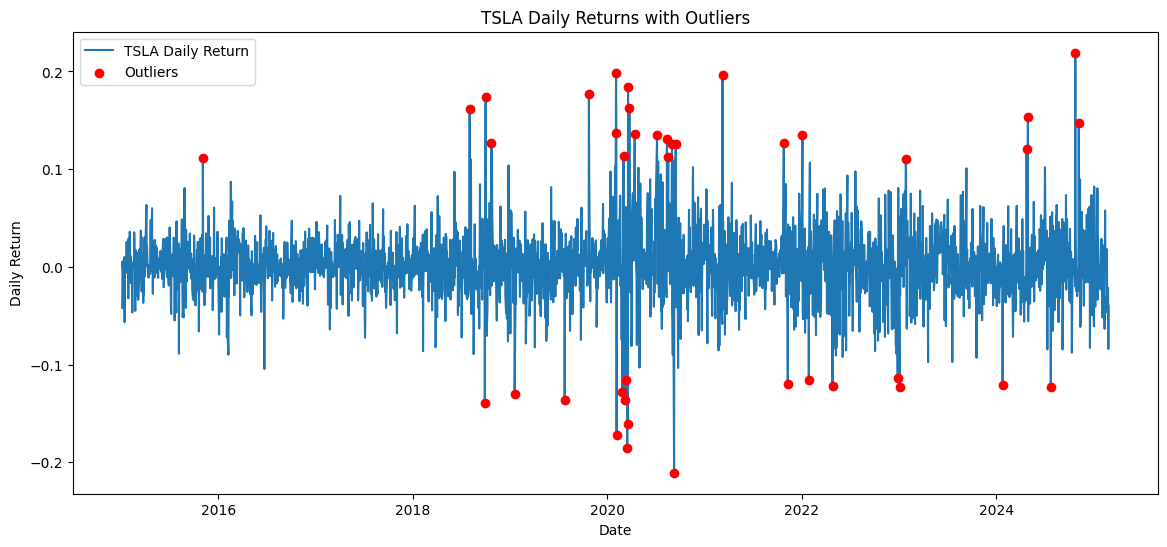

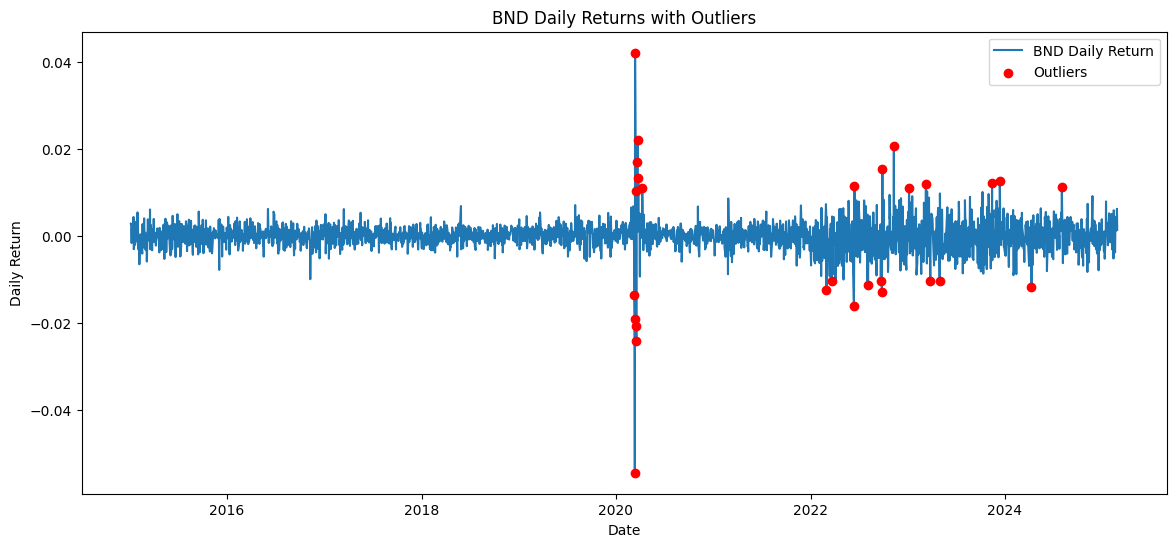

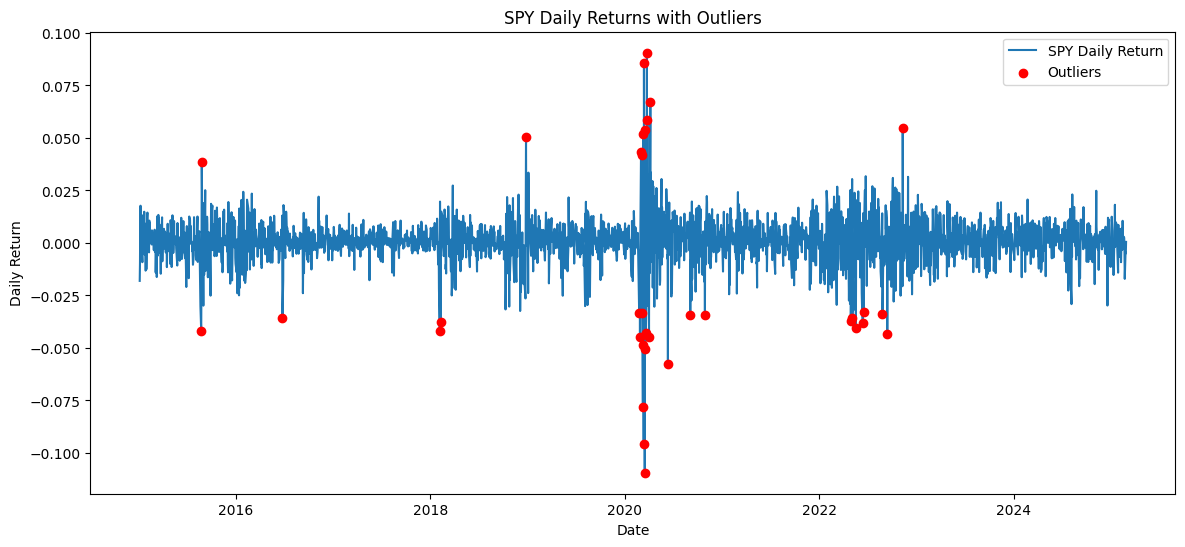

In [14]:
# Detect and plot outliers in daily returns
processor.plot_outliers()

##### Seasonality and Trends

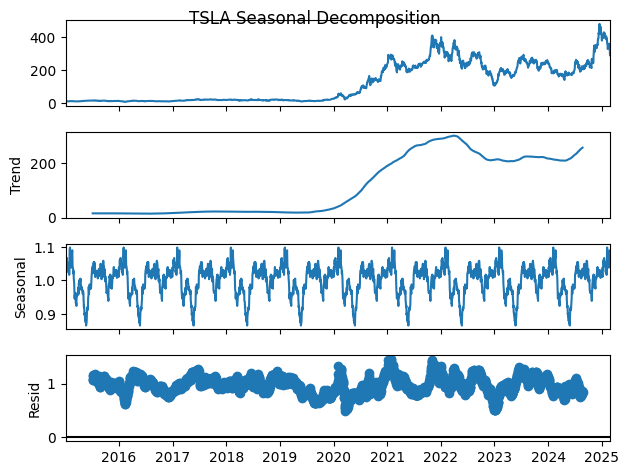

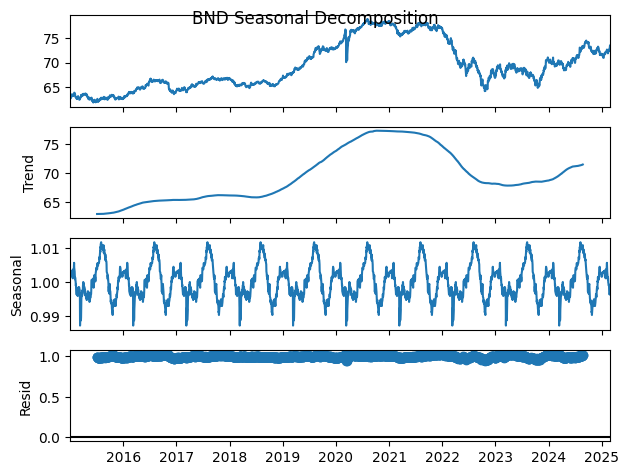

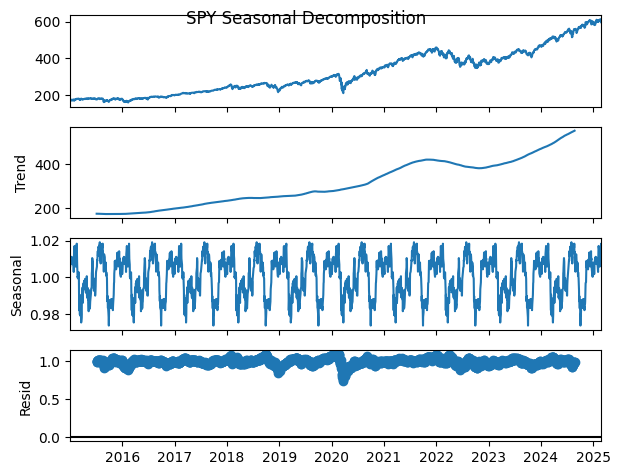

In [15]:
# Decompose time series
decomposition_results = processor.decompose_time_series()

In [16]:
# Calculate risk metrics (VaR and Sharpe Ratio)
risk_metrics = processor.calculate_risk_metrics()
for symbol, metrics in risk_metrics.items():
    print(f"\n{symbol} - Value at Risk (VaR): {metrics['VaR']:.4f}, Sharpe Ratio: {metrics['Sharpe Ratio']:.4f}")


TSLA - Value at Risk (VaR): -0.0519, Sharpe Ratio: 0.8012

BND - Value at Risk (VaR): -0.0048, Sharpe Ratio: 0.3180

SPY - Value at Risk (VaR): -0.0167, Sharpe Ratio: 0.7841


1. **Value at Risk (VaR):**
***VaR*** measures the potential loss in value of an asset or portfolio over a given time period, with a certain confidence level (like 95% or 99%). A more negative VaR indicates higher risk — more potential for large losses.

- **TSLA VaR**: -0.0519 → This means that TSLA has a higher potential loss compared to the others. For example, there’s a certain probability (like 5%) that TSLA could lose 5.19% of its value in a given time period. This reflects its high volatility.
BND VaR: -0.0048 → BND is a bond ETF, and its low VaR of 0.48% shows it’s a much more stable and lower-risk asset.
- **SPY VaR**: -0.0167 → SPY, representing the S&P 500, has a more moderate risk — a 1.67% potential loss — which aligns with its nature as a diversified index fund.
2. **Sharpe Ratio:**
The Sharpe Ratio measures risk-adjusted return — how much excess return you’re getting per unit of risk. Higher is better.

- **TSLA Sharpe Ratio**: 0.8012 → TSLA offers relatively strong risk-adjusted returns despite its high risk, which explains why some investors tolerate its volatility.
- **BND Sharpe Ratio**: 0.3180 → BND’s low Sharpe ratio shows its returns aren’t very high given the small amount of risk — but it’s still a safe investment.
SPY Sharpe Ratio: 0.7841 → SPY has a solid risk-adjusted return, close to TSLA’s, but with far lower risk, making it an efficient investment for balanced growth.
Interpretation:

- **TSLA**: High risk, high reward — the highest potential losses but also relatively strong risk-adjusted returns.
- **BND**: Low risk, low reward — it’s very stable but offers the lowest return relative to its risk.
- **SPY**: Balanced — it offers nearly as good risk-adjusted returns as TSLA but with much less risk.
